In [1]:
!git clone https://github.com/GuilhermeMarcon/graph-committee-e2e-absa.git

fatal: destination path 'graph-committee-e2e-absa' already exists and is not an empty directory.


In [2]:
!pip install nervaluate

In [3]:
import pandas as pd
from ast import literal_eval

DATASET = 'laptop14'

ROOT = '/content/graph-committee-e2e-absa/data/'
df = pd.read_excel(ROOT+DATASET+'/test.xlsx')
df = df.rename(columns={'text':'review', 'snippet':'review'})

ENTS_COLUMN = 1
for c in df.columns[ENTS_COLUMN:]:
    print(c)
    df[c] = df[c].apply(literal_eval)
df.head()

annotation
bert-base-multilingual-cased-e2eabsa-linear
bert-base-multilingual-cased-e2eabsa-san
bert-base-multilingual-cased-e2eabsa-tfm
bert-base-multilingual-cased-e2eabsa-crf
bert-base-multilingual-cased-e2eabsa-gru
bert-base-uncased-e2eabsa-linear
bert-base-uncased-e2eabsa-san
bert-base-uncased-e2eabsa-tfm
bert-base-uncased-e2eabsa-crf
bert-base-uncased-e2eabsa-gru
bert-base-uncased-e2eabsa-committee
multidomain-bert-base-multilingual-cased-e2eabsa-linear
multidomain-bert-base-multilingual-cased-e2eabsa-san
multidomain-bert-base-multilingual-cased-e2eabsa-tfm
multidomain-bert-base-multilingual-cased-e2eabsa-crf
multidomain-bert-base-multilingual-cased-e2eabsa-gru


,review,annotation,bert-base-multilingual-cased-e2eabsa-linear,bert-base-multilingual-cased-e2eabsa-san,bert-base-multilingual-cased-e2eabsa-tfm,bert-base-multilingual-cased-e2eabsa-crf,bert-base-multilingual-cased-e2eabsa-gru,bert-base-uncased-e2eabsa-linear,bert-base-uncased-e2eabsa-san,bert-base-uncased-e2eabsa-tfm,bert-base-uncased-e2eabsa-crf,bert-base-uncased-e2eabsa-gru,bert-base-uncased-e2eabsa-committee,multidomain-bert-base-multilingual-cased-e2eabsa-linear,multidomain-bert-base-multilingual-cased-e2eabsa-san,multidomain-bert-base-multilingual-cased-e2eabsa-tfm,multidomain-bert-base-multilingual-cased-e2eabsa-crf,multidomain-bert-base-multilingual-cased-e2eabsa-gru
0,"Boot time is super fast, around anywhere from ...","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]"
1,tech support would not fix the problem unless ...,"[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEU)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEU)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]"
2,but in resume this computer rocks!,[],[],[],[],[],[],[],[],[],[],[],[],[],"[(computer, NEG)]","[(computer, NEG)]",[],"[(computer, NEG)]"
3,Set up was easy.,"[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]",[],"[(Set, POS)]",[],[],"[(Set, POS)]"
4,Did not enjoy the new Windows 8 and touchscree...,"[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, POS), (touchscreen, NEG)]","[(Windows 8, POS)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen, NEG)]","[(Windows 8, POS), (touchscreen, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, POS)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]"


In [4]:
## this converts those entities to span
## it will try to find the entity in the snippet, if it can't, will ignore that entity
def entity_to_span(text, ent, pol='NEU'):
    # print(text, '\n\t', ent, pol)
    span = {'label':pol, 'start':0, 'end':0}
    try: span['start'] = text.index(ent)
    except ValueError:
        # print(text, '\n\t', ent)
        return None
    span['end'] = span['start'] + len(ent)
    return span

def df_to_span(row, col):
    l = []
    for ent in row[col]:
        span = entity_to_span(row['review'], ent[0], ent[1])
        if span is not None: l.append(span)
    return l

In [5]:
spans = pd.DataFrame(df.values[:, :ENTS_COLUMN], columns=['review'])
for col in df.columns[ENTS_COLUMN:]:
    print(col)
    spans[col] = df.apply(lambda row: df_to_span(row, col), axis=1)
spans.head()

annotation
bert-base-multilingual-cased-e2eabsa-linear
bert-base-multilingual-cased-e2eabsa-san
bert-base-multilingual-cased-e2eabsa-tfm
bert-base-multilingual-cased-e2eabsa-crf
bert-base-multilingual-cased-e2eabsa-gru
bert-base-uncased-e2eabsa-linear
bert-base-uncased-e2eabsa-san
bert-base-uncased-e2eabsa-tfm
bert-base-uncased-e2eabsa-crf
bert-base-uncased-e2eabsa-gru
bert-base-uncased-e2eabsa-committee
multidomain-bert-base-multilingual-cased-e2eabsa-linear
multidomain-bert-base-multilingual-cased-e2eabsa-san
multidomain-bert-base-multilingual-cased-e2eabsa-tfm
multidomain-bert-base-multilingual-cased-e2eabsa-crf
multidomain-bert-base-multilingual-cased-e2eabsa-gru


,review,annotation,bert-base-multilingual-cased-e2eabsa-linear,bert-base-multilingual-cased-e2eabsa-san,bert-base-multilingual-cased-e2eabsa-tfm,bert-base-multilingual-cased-e2eabsa-crf,bert-base-multilingual-cased-e2eabsa-gru,bert-base-uncased-e2eabsa-linear,bert-base-uncased-e2eabsa-san,bert-base-uncased-e2eabsa-tfm,bert-base-uncased-e2eabsa-crf,bert-base-uncased-e2eabsa-gru,bert-base-uncased-e2eabsa-committee,multidomain-bert-base-multilingual-cased-e2eabsa-linear,multidomain-bert-base-multilingual-cased-e2eabsa-san,multidomain-bert-base-multilingual-cased-e2eabsa-tfm,multidomain-bert-base-multilingual-cased-e2eabsa-crf,multidomain-bert-base-multilingual-cased-e2eabsa-gru
0,"Boot time is super fast, around anywhere from ...","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]","[{'label': 'POS', 'start': 0, 'end': 9}]"
1,tech support would not fix the problem unless ...,"[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEU', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEU', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]","[{'label': 'NEG', 'start': 0, 'end': 12}]"
2,but in resume this computer rocks!,[],[],[],[],[],[],[],[],[],[],[],[],[],"[{'label': 'NEG', 'start': 19, 'end': 27}]","[{'label': 'NEG', 'start': 19, 'end': 27}]",[],"[{'label': 'NEG', 'start': 19, 'end': 27}]"
3,Set up was easy.,"[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]","[{'label': 'POS', 'start': 0, 'end': 6}]",[],"[{'label': 'POS', 'start': 0, 'end': 3}]",[],[],"[{'label': 'POS', 'start': 0, 'end': 3}]"
4,Did not enjoy the new Windows 8 and touchscree...,"[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'POS', 'start': 22, 'end': 31}, {'l...","[{'label': 'POS', 'start': 22, 'end': 31}]","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'POS', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 36, 'end': 57}]","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 22, 'end': 31}, {'l...","[{'label': 'NEG', 'start': 36, 'end': 57}]","[{'label': 'NEG', 'start': 36, 'end': 57}]","[{'label': 'POS', 'start': 36, 'end': 57}]","[{'label': 'NEG', 'start': 36, 'end': 57}]","[{'label': 'NEG', 'start': 36, 'end': 57}]"


In [6]:
import pandas as pd
from nervaluate import Evaluator
def evaluate(df:pd.DataFrame, true:str, pred:str):
    return Evaluator(df[true].values, df[pred].values, tags=['POS', 'NEU', 'NEG']).evaluate()

In [7]:
metrics = {}
for c in spans.columns[ENTS_COLUMN:]:
    metrics[c] = evaluate(spans, 'annotation', c)
metrics

{'annotation': ({'ent_type': {'correct': 628,
    'incorrect': 0,
    'partial': 0,
    'missed': 0,
    'spurious': 0,
    'possible': 628,
    'actual': 628,
    'precision': 1.0,
    'recall': 1.0,
    'f1': 1.0},
   'partial': {'correct': 628,
    'incorrect': 0,
    'partial': 0,
    'missed': 0,
    'spurious': 0,
    'possible': 628,
    'actual': 628,
    'precision': 1.0,
    'recall': 1.0,
    'f1': 1.0},
   'strict': {'correct': 628,
    'incorrect': 0,
    'partial': 0,
    'missed': 0,
    'spurious': 0,
    'possible': 628,
    'actual': 628,
    'precision': 1.0,
    'recall': 1.0,
    'f1': 1.0},
   'exact': {'correct': 628,
    'incorrect': 0,
    'partial': 0,
    'missed': 0,
    'spurious': 0,
    'possible': 628,
    'actual': 628,
    'precision': 1.0,
    'recall': 1.0,
    'f1': 1.0}},
  {'POS': {'ent_type': {'correct': 336,
     'incorrect': 0,
     'partial': 0,
     'missed': 0,
     'spurious': 0,
     'possible': 336,
     'actual': 336,
     'precision': 1

In [8]:
import pandas as pd
data = []
for model in metrics.keys():
    data.append([])
    data[-1] = []
    data[-1].append(model)
    data[-1].append(metrics[model][0]['strict']['precision'])
    data[-1].append(metrics[model][0]['strict']['recall'])
    data[-1].append(metrics[model][0]['strict']['f1'])

pd.DataFrame(data, columns=['model', 'precision', 'recall', 'f1'])

,model,precision,recall,f1
0,annotation,1.000000,1.000000,1.000000
1,bert-base-multilingual-cased-e2eabsa-linear,0.593851,0.581616,0.587670
2,bert-base-multilingual-cased-e2eabsa-san,0.613893,0.601266,0.607514
3,bert-base-multilingual-cased-e2eabsa-tfm,0.631933,0.595880,0.613377
4,bert-base-multilingual-cased-e2eabsa-crf,0.610368,0.578447,0.593979
5,bert-base-multilingual-cased-e2eabsa-gru,0.619205,0.592710,0.605668
6,bert-base-uncased-e2eabsa-linear,0.626280,0.581616,0.603122
7,bert-base-uncased-e2eabsa-san,0.641068,0.608558,0.624390
8,bert-base-uncased-e2eabsa-tfm,0.643697,0.606973,0.624796
9,bert-base-uncased-e2eabsa-crf,0.618487,0.583201,0.600326


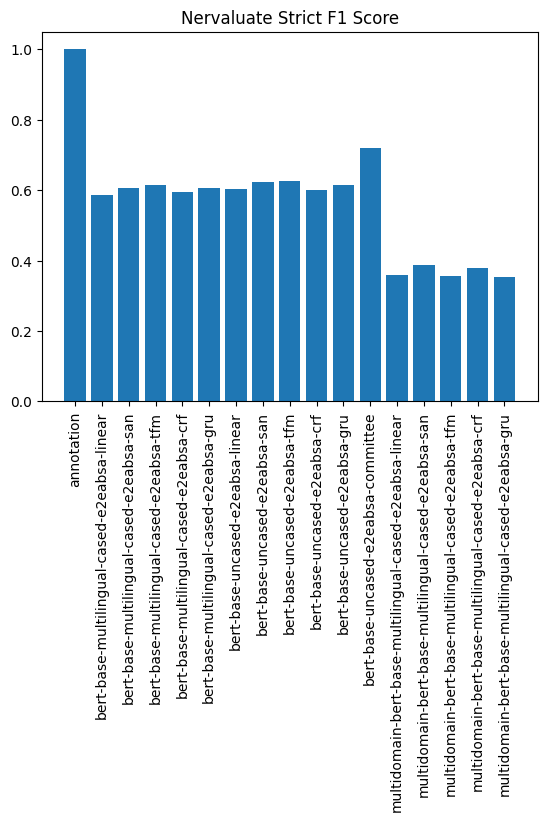

In [9]:
import matplotlib.pyplot as plt
xticks = list(metrics.keys())
# print(xticks)
x = list(range(len(xticks)))
# print(x)
y = [metrics[x][0]['strict']['f1'] for x in xticks]
# print(y)

fig, ax = plt.subplots(1, 1)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(xticks, rotation='vertical')
plt.title("Nervaluate Strict F1 Score")
plt.show()

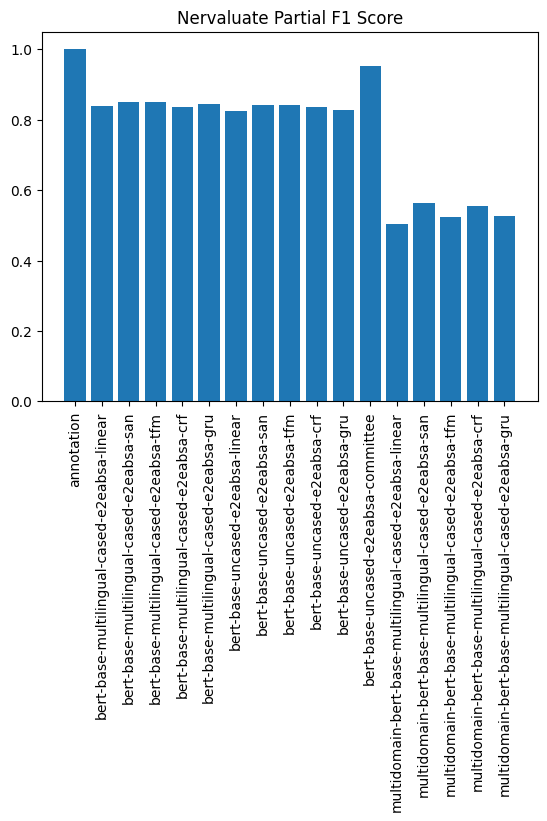

In [10]:
import matplotlib.pyplot as plt
xticks = list(metrics.keys())
# print(xticks)
x = list(range(len(xticks)))
# print(x)
y = [metrics[x][0]['partial']['f1'] for x in xticks]
# print(y)

fig, ax = plt.subplots(1, 1)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(xticks, rotation='vertical')
plt.title("Nervaluate Partial F1 Score")
plt.show()